## Examples using intake with xarray

In this notebook, we'll take a look at some of the file formats that can be written to `xarray` objects.

In [1]:
import intake
intake.output_notebook()

## Inline example

Anything that can be opened with `xarray.open_dataset` can be accessed with intake using `intake.open_xarray`. 

### GRIB
In this first example we will use an OpenDAP URL to lazily access a grib file. 

In [2]:
grib_da = intake.open_xarray('http://thredds.ucar.edu/thredds/dodsC/grib/FNMOC/WW3/Global_1p0deg/Best').to_dask()
grib_da

<xarray.Dataset>
Dimensions:               (lat: 181, lon: 360, time: 215, time1: 279, time2: 153)
Coordinates:
  * lat                   (lat) float32 -90.00001 -89.00001 ... 89.99999
  * lon                   (lon) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * time                  (time) datetime64[ns] 2018-11-13 ... 2018-12-21
    reftime               (time) datetime64[ns] ...
  * time1                 (time1) datetime64[ns] 2018-11-13 ... 2018-12-21
    reftime1              (time1) datetime64[ns] ...
  * time2                 (time2) datetime64[ns] 2018-11-13 ... 2018-12-21
    reftime2              (time2) datetime64[ns] ...
Data variables:
    LatLon_Projection     int32 0
    swl_wav_dir_surface   (time1, lat, lon) float32 ...
    sig_wav_ht_surface    (time1, lat, lon) float32 ...
    wnd_wav_dir_surface   (time2, lat, lon) float32 ...
    wnd_wav_ht_surface    (time2, lat, lon) float32 ...
    wnd_wav_per_surface   (time1, lat, lon) float32 ...
    swl_wav_ht_surface   

### Image

Intake-xarray also provides easy access to other backends to support loading other file formats. Such as image data.

In [3]:
image_da = intake.open_image('https://s3.amazonaws.com/earth-data/UCMerced_LandUse/Images/tenniscourt/tenniscourt02.tif').to_dask()
image_da

<xarray.DataArray 'getitem-8f89c39873d49025a2cd763a803e3ce9' (y: 256, x: 256, band: 3)>
dask.array<shape=(256, 256, 3), dtype=uint8, chunksize=(256, 256, 3)>
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 247 248 249 250 251 252 253 254 255
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 247 248 249 250 251 252 253 254 255
  * band     (band) int64 0 1 2

In [4]:
from PIL import Image

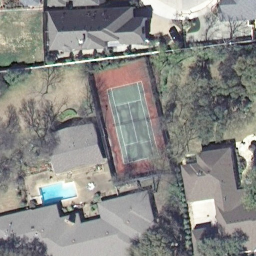

In [5]:
Image.fromarray(image_da.data.compute())

## Catalog examples

There is a sample catalog at `./catalog.yml` containing some examples of how to use the intake-xarray plugins. 

In [6]:
cat = intake.open_catalog('catalog.yml')
list(cat)

['esgf',
 'geotiff',
 'image',
 'images_labelled',
 'images_unlabelled',
 'grib_thredds',
 'netcdf_url']

### NetCDF

Files can be read from any https as long as caching is enabled. See the catalog entry for exact spec.

In [7]:
nc = cat.netcdf_url
nc_da = nc.to_dask()
nc_da

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Using the plotting API, we can plot straight from the intake object.

In [27]:
nc.hvplot.line()

:DynamicMap   [lon,lat]
   :Curve   [time]   (air)

### Grib: from unauthenticated OpenDAP

Grib files can be read from catalog specs just as in the inline example above.

In [9]:
grib_thredds = cat.grib_thredds
grib_thredds_da = grib_thredds.to_dask()
grib_thredds_da

<xarray.Dataset>
Dimensions:               (lat: 181, lon: 360, time: 215, time1: 279, time2: 153)
Coordinates:
  * lat                   (lat) float32 -90.00001 -89.00001 ... 89.99999
  * lon                   (lon) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * time                  (time) datetime64[ns] 2018-11-13 ... 2018-12-21
    reftime               (time) datetime64[ns] ...
  * time1                 (time1) datetime64[ns] 2018-11-13 ... 2018-12-21
    reftime1              (time1) datetime64[ns] ...
  * time2                 (time2) datetime64[ns] 2018-11-13 ... 2018-12-21
    reftime2              (time2) datetime64[ns] ...
Data variables:
    LatLon_Projection     int32 0
    swl_wav_dir_surface   (time1, lat, lon) float32 ...
    sig_wav_ht_surface    (time1, lat, lon) float32 ...
    wnd_wav_dir_surface   (time2, lat, lon) float32 ...
    wnd_wav_ht_surface    (time2, lat, lon) float32 ...
    wnd_wav_per_surface   (time1, lat, lon) float32 ...
    swl_wav_ht_surface   

In [10]:
import hvplot.xarray

In [28]:
var = 'sig_wav_ht_surface'
time_dim = grib_thredds_da[var].dims[0]
grib_thredds_da[var].hvplot(x='lon', y='lat', groupby=time_dim, rasterize=True)

:DynamicMap   [time1]
   :Image   [lon,lat]   (sig_wav_ht_surface)

## Image

Image files can be read in using a variety of backends.

In [12]:
image = cat.image(landuse='airplane', id=0)
image_da = image.to_dask()

In [13]:
image_da

<xarray.DataArray 'getitem-78cec8b050fb7bbb8518b915a200a13a' (y: 256, x: 256, band: 3)>
dask.array<shape=(256, 256, 3), dtype=uint8, chunksize=(256, 256, 3)>
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 247 248 249 250 251 252 253 254 255
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 247 248 249 250 251 252 253 254 255
  * band     (band) int64 0 1 2

In [14]:
from PIL import Image

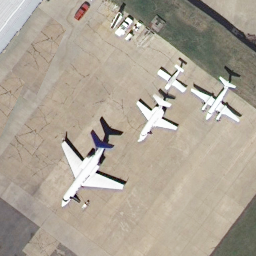

In [15]:
np_array = image_da.data.compute()
Image.fromarray(np_array)

#### Multiple Images

When loading multiple images, if the images don't have exactly the same size, then you will nan slices in your data and the dtype will be floats. 

In [29]:
labelled_da = cat.images_labelled(id=0).to_dask()
labelled_da

<xarray.Dataset>
Dimensions:            (band: 3, x: 256, y: 256)
Coordinates:
  * y                  (y) int64 0 1 2 3 4 5 6 7 ... 249 250 251 252 253 254 255
  * x                  (x) int64 0 1 2 3 4 5 6 7 ... 249 250 251 252 253 254 255
  * band               (band) int64 0 1 2
    id                 int64 0
Data variables:
    beach              (y, x, band) uint8 dask.array<shape=(256, 256, 3), chunksize=(256, 256, 3)>
    buildings          (y, x, band) uint8 dask.array<shape=(256, 256, 3), chunksize=(256, 256, 3)>
    denseresidential   (y, x, band) uint8 dask.array<shape=(256, 256, 3), chunksize=(256, 256, 3)>
    freeway            (y, x, band) uint8 dask.array<shape=(256, 256, 3), chunksize=(256, 256, 3)>
    sparseresidential  (y, x, band) uint8 dask.array<shape=(256, 256, 3), chunksize=(256, 256, 3)>
    mediumresidential  (y, x, band) uint8 dask.array<shape=(256, 256, 3), chunksize=(256, 256, 3)>
    airplane           (y, x, band) uint8 dask.array<shape=(256, 256, 3), ch

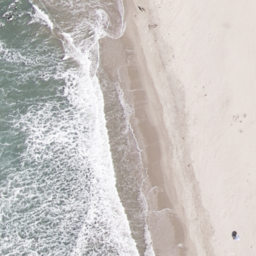

In [18]:
np_array = labelled_da.beach.dropna('x', 'all').dropna('y', 'all').data.compute().astype('uint8')
Image.fromarray(np_array)

If we aren't interested in labels, then it is even faster to read in the files. 

In [30]:
unlabelled_da = cat.images_unlabelled(id=5).to_dask()
unlabelled_da

<xarray.DataArray 'getitem-9a46d7037fc00d04bd1219b53d86e953' (concat_dim: 21, y: 256, x: 256, band: 3)>
dask.array<shape=(21, 256, 256, 3), dtype=float64, chunksize=(1, 256, 256, 3)>
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 247 248 249 250 251 252 253 254 255
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 247 248 249 250 251 252 253 254 255
  * band     (band) int64 0 1 2
Dimensions without coordinates: concat_dim

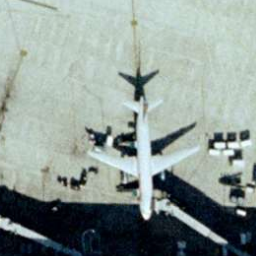

In [23]:
np_array = unlabelled_da[1].dropna('x', 'all').dropna('y', 'all').data.compute().astype('uint8')
Image.fromarray(np_array)

### GeoTiff
For geotiffs there is a special `rasterio` backend that support loading using gdal. 

In [31]:
geotiff = cat.geotiff
geotiff_da = geotiff.to_dask()
geotiff_da

<xarray.DataArray (band: 6, y: 300, x: 300)>
dask.array<shape=(6, 300, 300), dtype=float64, chunksize=(1, 50, 50)>
Coordinates:
  * y                (y) float64 4.309e+06 4.309e+06 ... 4.264e+06 4.264e+06
  * x                (x) float64 3.324e+05 3.326e+05 ... 3.771e+05 3.772e+05
  * band             (band) int64 1 2 3 4 5 7
    collection_date  (band) datetime64[ns] dask.array<shape=(6,), chunksize=(1,)>
    processing_date  (band) datetime64[ns] dask.array<shape=(6,), chunksize=(1,)>
Attributes:
    transform:   (150.0, 0.0, 332325.0, 0.0, -150.0, 4309275.0)
    crs:         +init=epsg:32611
    res:         (150.0, 150.0)
    is_tiled:    0
    nodatavals:  (nan,)

In [26]:
geotiff.plot.band_image()

:DynamicMap   [band]
   :Image   [x,y]   (value)